In [34]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
tabela = pd.read_csv('vozila brez nepotrebnih vejc in euro.csv', sep=';', encoding='latin1', low_memory=False)
tabela = tabela[['Registrsko obmocje', 'Masa', 'Znamka', 'Masa', 'ccm', 'Moc', 'Gorivo',
                 'Najvisja hitrost', 'CO2', 'Poraba goriva', 'Okoljevarstvena oznaka', 'Leto izdelave']]

In [44]:
#tabela[:10]

Za predstavo, kateri avtomobili se vozijo po slovenskih cestah, si oglejmo njihovo porazdelitev po 10 najbolj pogosto zastopanih znamkah.

In [ ]:
a = tabela.groupby('Registrsko obmocje')['Znamka']
pogoste = ['RENAULT', 'VOLKSWAGEN', 'OPEL', 'CITROEN', 'PEUGEOT', 'FORD', 'SKODA', 'AUDI', 'BMW', 'HYUNDAI']
zn = pd.DataFrame(a.value_counts()).unstack()['Znamka'][pogoste]
vsote = pd.DataFrame(zn.sum(axis = 1))

zn_norm = zn.div(zn.sum(axis=1), axis=0)

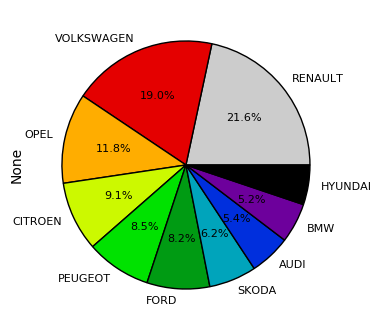

In [45]:
znamke = tabela.groupby('Znamka')
znamke.size().sort_values(ascending=False)[:10].plot(kind='pie',figsize=(4, 4), fontsize=8, autopct='%1.1f%%', colormap='spectral_r')

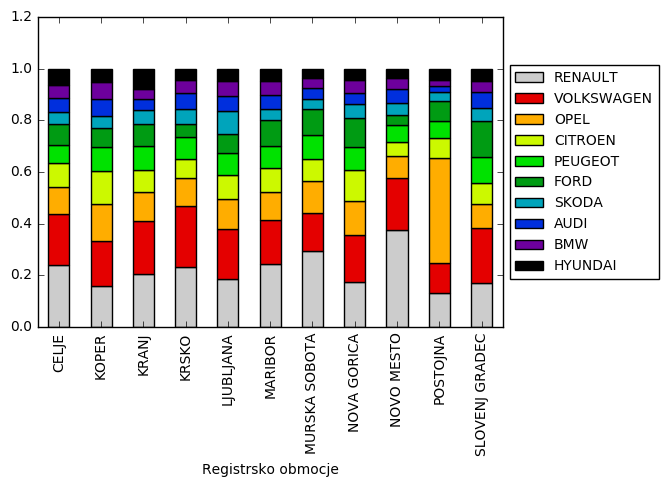

In [43]:
zn_norm.plot(kind='bar', stacked=True, colormap='spectral_r', legend=False)
plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))

Največji delež predstavljajo znamke Renault, Volkswagen in Opel. 

V diagramu, ki kaže zastopanost znamk v posameznem registrskem območju, opazimo, da je porazdelitev, razen nekaj izjem, dokaj enakomerna. 

Najbolj izstopa relativno visoka pogostost Opla v Postojni.

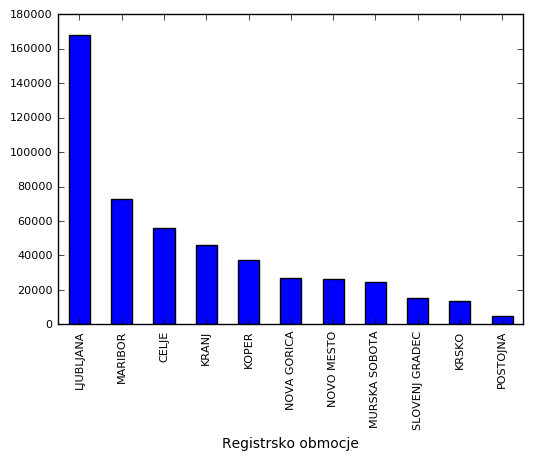

In [7]:
stevilo = tabela.groupby('Registrsko obmocje')
stevilo.size().sort_values(ascending=False).plot(kind='bar',figsize=(6, 4), fontsize=8)

Ni presenetljivo, da je več avtomobilov v krajih z več prebivalci. Žal se statistične regije ne ujemajo z registrskimi območji in izračun, koliko avtomobilov povprečno ima prebivalecv posameznem območju, ni mogoč.

Lahko pa raziščemo, kje so avtomobili najbolj ekološki, najmočnejši in najnovejši.

Začnimo z analizo porabe goriva in izpustom CO2.

In [8]:
poraba = tabela[['Registrsko obmocje', 'Poraba goriva', 'CO2']]

In [46]:
skupna_po_krajih = round(poraba.groupby('Registrsko obmocje')[['CO2', 'Poraba goriva']].mean(), 3)
poraba_po_krajih = pd.DataFrame(skupna_po_krajih).sort_values('CO2', ascending=False)
PORABA = poraba_po_krajih
PORABA['CO2%'] = round((PORABA['CO2'] - min(PORABA['CO2'])) / (max(PORABA['CO2']) - min(PORABA['CO2'])), 3)
PORABA['gorivo%'] = round((PORABA['Poraba goriva'] - min(PORABA['Poraba goriva'])) / (max(PORABA['Poraba goriva']) - min(PORABA['Poraba goriva'])), 3)

#PORABA.reset_index()

Stolpec z odstotki je dodan, da lahko z grafa razberemo (ne)ujemanje med porabo goriva in izpustom CO2. 

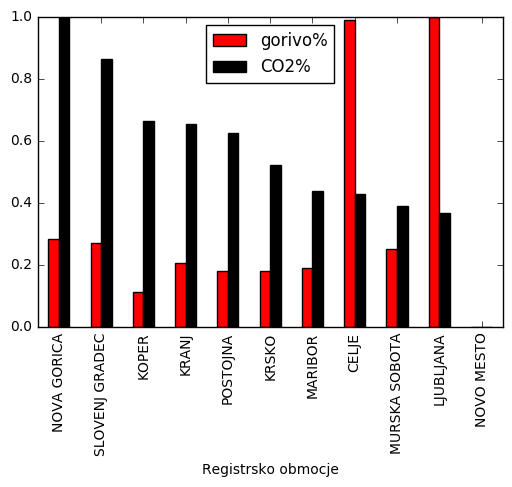

In [51]:
PORABA[['gorivo%', 'CO2%']].plot(kind='bar', color=('red', 'black'))

In [11]:
moc = tabela[['Registrsko obmocje', 'Moc', 'Poraba goriva', 'Leto izdelave', 'Okoljevarstvena oznaka']]

In [12]:
moc_kraji = round(moc.groupby('Registrsko obmocje')[['Moc', 'Poraba goriva', 'Leto izdelave', 'Okoljevarstvena oznaka']].mean(), 3)
MOC = pd.DataFrame(moc_kraji).sort_values('Moc', ascending=False)


Dodajmo še stolpce z odstotkovnimi vrednostmi.

In [13]:
MOC['gorivo%'] = round((MOC['Poraba goriva'] - min(MOC['Poraba goriva'])) / (max(MOC['Poraba goriva']) - min(MOC['Poraba goriva'])), 3)
MOC['moc%'] = round((MOC['Moc'] - min(MOC['Moc'])) / (max(MOC['Moc']) - min(MOC['Moc'])), 3)
MOC['leto%'] = round((MOC['Leto izdelave'] - min(MOC['Leto izdelave'])) / (max(MOC['Leto izdelave']) - min(MOC['Leto izdelave'])), 3)
MOC['okolje%'] = round((MOC['Okoljevarstvena oznaka'] - min(MOC['Okoljevarstvena oznaka'])
                 ) / (max(MOC['Okoljevarstvena oznaka']) - min(MOC['Okoljevarstvena oznaka'])), 3)

MOC.reset_index()

,Registrsko obmocje,Moc,Poraba goriva,Leto izdelave,Okoljevarstvena oznaka,gorivo%,moc%,leto%,okolje%
0,LJUBLJANA,85.262,6.526,2009.592,4.446,1.000,1.000,0.750,0.733
1,KOPER,85.228,5.800,2009.071,4.335,0.112,0.995,0.374,0.376
2,POSTOJNA,83.209,5.855,2009.938,4.529,0.180,0.699,1.000,1.000
3,SLOVENJ GRADEC,82.887,5.929,2009.348,4.387,0.270,0.652,0.574,0.543
4,NOVA GORICA,81.844,5.941,2008.554,4.218,0.285,0.499,0.000,0.000
5,CELJE,81.640,6.518,2009.097,4.338,0.990,0.469,0.392,0.386
6,KRANJ,81.494,5.876,2009.227,4.358,0.205,0.448,0.486,0.450
7,MARIBOR,81.148,5.863,2009.302,4.370,0.189,0.397,0.540,0.489
8,KRSKO,81.116,5.857,2008.753,4.270,0.182,0.392,0.144,0.167
9,NOVO MESTO,79.756,5.708,2009.086,4.324,0.000,0.193,0.384,0.341


Raziščimo povezavo med porabo goriva in močjo avtomobilov.

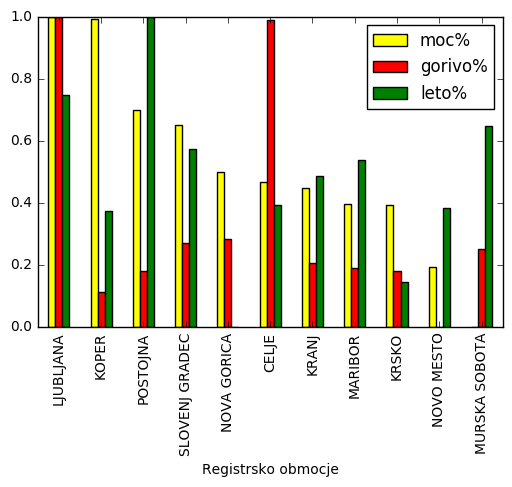

In [55]:
MOC[['moc%', 'gorivo%', 'leto%']].plot(kind='bar', color=('yellow', 'red', 'green'))

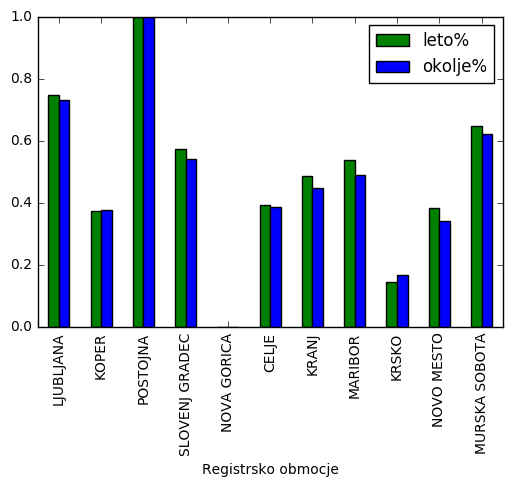

In [53]:
MOC[['leto%', 'okolje%']].plot(kind='bar', color=('green', 'blue'))

Tam, kjer so avtomobili v povprečju novejši, imajo tudi višjo okoljevarstveno oznako, kar je seveda pričakovano.

In [16]:
co2 = tabela[['Registrsko obmocje', 'CO2']]

In [17]:
co2_kraji = co2.groupby('Registrsko obmocje')['CO2'].mean()
co2_po_krajih = pd.DataFrame(co2_kraji).sort_values('CO2')
CO2 = co2_po_krajih
#CO2

In [18]:
leto = tabela[['Registrsko obmocje', 'Leto izdelave']]

In [19]:
leto_kraji = leto.groupby('Registrsko obmocje')['Leto izdelave'].mean()
leto_po_krajih = pd.DataFrame(leto_kraji).sort_values('Leto izdelave')
LETO = leto_po_krajih
#LETO

In [20]:
euro = tabela[['Registrsko obmocje', 'Okoljevarstvena oznaka']]

In [21]:
euro_kraji = euro.groupby('Registrsko obmocje')['Okoljevarstvena oznaka'].mean()
euro_kraji
euro_po_krajih = pd.DataFrame(euro_kraji).sort_values('Okoljevarstvena oznaka')
EURO = euro_po_krajih
#EURO

In [22]:
#HURA, leto izdelave se ujema z okoljevarstveno oznako!!